kappa = 483248881117108.56
Using YahilProfile/Yahil_Gam133.dat
filename = yahil1d_hdf5_chk_0000_26blk
time = 0.0  s
variable.shape = globalblock( 26 ) * sub( 8 ) =  (208,)
Using visit_data_26blk.txt
144


<IPython.core.display.Javascript object>


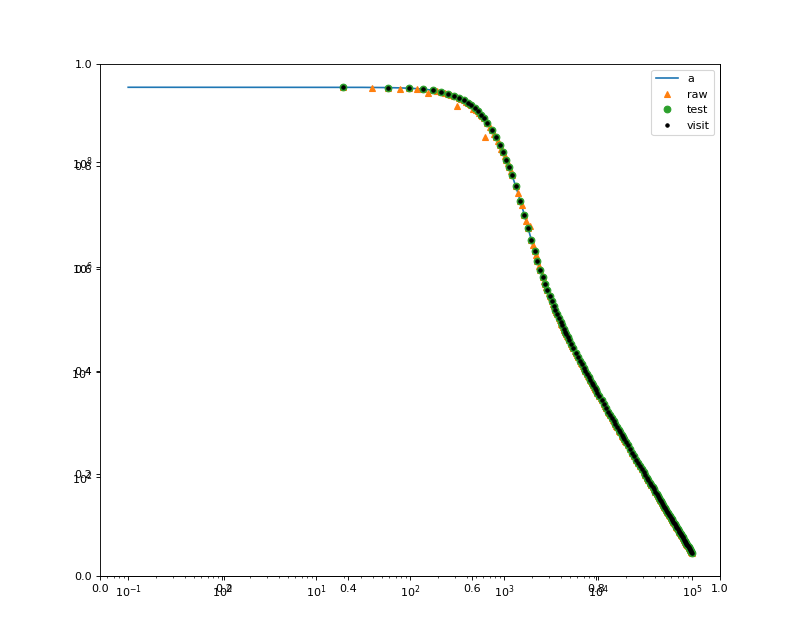

In [1]:
# import library
import numpy as np
import math
import rclib.IO as rcIO # make sure the lib is linked to the same directory
import rclib.plot as rcplt
from ipywidgets import * 

second      = 1.
centimeter  = 1.
gram        = 1.
erg         = 1.

millisecond = 1.0e-3 * second
meter       = 1e2 * centimeter
kilometer   = 1e3 * meter

Gravitational_constant = 6.673e-8                   # CGS
light_speed            = 3e10 * centimeter / second # [cm s-1]

gamma       = 1.33
profilename = 'Yahil_Gam133.dat'

collapse_time     = 150 * millisecond
central_density   = 7.0e9*gram/(centimeter**3) # [g cm^-3]
central_pressure  = 6.0e27*erg/(centimeter**3)# [erg cm^-3]
core_radius_order = 4.98 # 10^order in [km]
number_element    = 128

kappa = central_pressure / pow( central_density, gamma )
radius = np.logspace(-1, core_radius_order, num=number_element) * kilometer # km

print('kappa =', kappa)

[X1D, D1D, V1D, M1D] = rcIO.IO_YahilProfile(profilename)

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import rclib.IO as rcIO

fileID = 0
filefollowindex = '_26blk'

[ time, gsurr_blks, which_child, bounding_box, block_size, radius_raw, dens, radius_1dx, dens_1dx, velx_1dx ] \
= rcIO.FLASH_IO_1D( '', 'yahil1d_hdf5_chk_', fileID, filefollowindex, 'nodescribe' ) 
test_time = [collapse_time - time* second]

[R_visit, D_visit] = rcIO.IO_VisitCurve('visit_data_26blk.txt')

radius_test = np.zeros(320)
dens_test = np.zeros(320)
dens_test2 = np.zeros(320)
dens_test3 = np.zeros(320)

count = 0
count2 = 0
bad_count = 0
bad_dens1 = np.zeros(320)
bad_dens_corrct1 = np.zeros(320)

for ii in range(len(which_child)):
    for jj in range(8): 
        kk = jj + ii * 8
        dsubcell = block_size[ii,0]/8
        radius_test[kk] = bounding_box[ii,0,0] + dsubcell * (jj+0.5)
        if (gsurr_blks[ii,0,0,1,1] == 1):
            dens_test[kk] = dens[ii,0,0,jj]
            count = count + 1        
print(count)

fig, axs = plt.subplots(1,1, figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplots_adjust(bottom=0.10, top=0.9)
for mt in test_time:
    dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(mt,gamma-2)
    D_interp = np.interp(dimensionless_X, X1D, D1D)
    V_interp = np.interp(dimensionless_X, X1D, V1D)
    M_interp = np.interp(dimensionless_X, X1D, M1D)

    D = pow(Gravitational_constant,-1) * pow(mt,-2) * D_interp
    V = pow(kappa,1/2) * pow(Gravitational_constant,(1-gamma)/2) \
    * pow(mt,1-gamma) * V_interp
    
    ax1 = fig.add_subplot(111)
    ax1.loglog(radius/kilometer, D,label='a')
    ax1.loglog(radius_1dx/kilometer, dens_1dx,'^',\
           label='raw')
    ax1.loglog(radius_test/kilometer, dens_test,'o',\
               label='test')
    ax1.loglog(R_visit/kilometer, D_visit,'.k',\
               label='visit')
    
ax1.legend(loc ='best')

In [2]:
for i in range(22):
    for j in range(8):
        kk = j + i * 8
        if (gsurr_blks[i,0,0,1,1] == 1):
            print('%.03e'%radius_raw[kk], '%.02e'%dens[i,0,0,j],i,j)
        else:
            print('%.03e'%radius_raw[kk], '%.02e'%dens[i,0,0,j],i,j,'-')
    print('')

6.250e+07 3.02e+08 0 0 -
1.875e+08 6.22e+06 0 1 -
3.125e+08 2.70e+05 0 2 -
4.375e+08 6.46e+04 0 3 -
5.625e+08 2.59e+04 0 4 -
6.875e+08 1.31e+04 0 5 -
8.125e+08 7.57e+03 0 6 -
9.375e+08 4.78e+03 0 7 -

3.125e+07 1.17e+09 1 0 -
9.375e+07 1.78e+08 1 1 -
1.562e+08 1.50e+07 1 2 -
2.188e+08 1.73e+06 1 3 -
2.812e+08 4.22e+05 1 4 -
3.438e+08 1.67e+05 1 5 -
4.062e+08 8.48e+04 1 6 -
4.688e+08 4.94e+04 1 7 -

1.562e+07 2.09e+09 2 0 -
4.688e+07 1.03e+09 2 1 -
7.812e+07 3.41e+08 2 2 -
1.094e+08 9.48e+07 2 3 -
1.406e+08 2.59e+07 2 4 -
1.719e+08 7.63e+06 2 5 -
2.031e+08 2.60e+06 2 6 -
2.344e+08 1.07e+06 2 7 -

7.812e+06 2.50e+09 3 0 -
2.344e+07 2.03e+09 3 1 -
3.906e+07 1.40e+09 3 2 -
5.469e+07 8.47e+08 3 3 -
7.031e+07 4.74e+08 3 4 -
8.594e+07 2.52e+08 3 5 -
1.016e+08 1.31e+08 3 6 -
1.172e+08 6.77e+07 3 7 -

3.906e+06 2.62e+09 4 0 -
1.172e+07 2.49e+09 4 1 -
1.953e+07 2.24e+09 4 2 -
2.734e+07 1.93e+09 4 3 -
3.516e+07 1.59e+09 4 4 -
4.297e+07 1.27e+09 4 5 -
5.078e+07 9.83e+08 4 6 -
5.859e+07 7.46e+08 4 